# Проект: Статистический анализ данных

## Описание данных 

Перед нами информация и данные сервиса аренды и самокатов GoFast. Моя задача поработать с представленными данными, а именно мне нужно:
- Оценить данные, рассмотреть, что представлено и какие типы данных присутствуют в таблицах.
- Обработать данные привести в стоблцы в порядок, избавиться от проппусков привести все значения к нужным типам данных.
- Исследовать данные построить гистограммы, где это нужно
- Провести дополнительные манипуляции с данными
- Проверить гипотезы

Сервисом можно пользоваться:
без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 
8
8 рублей;
стоимость старта (начала поездки) — 
50
50 рублей;
с подпиской Ultra
абонентская плата — 
199
199 рублей в месяц;
стоимость одной минуты поездки — 
6
6 рублей;
стоимость старта — бесплатно.

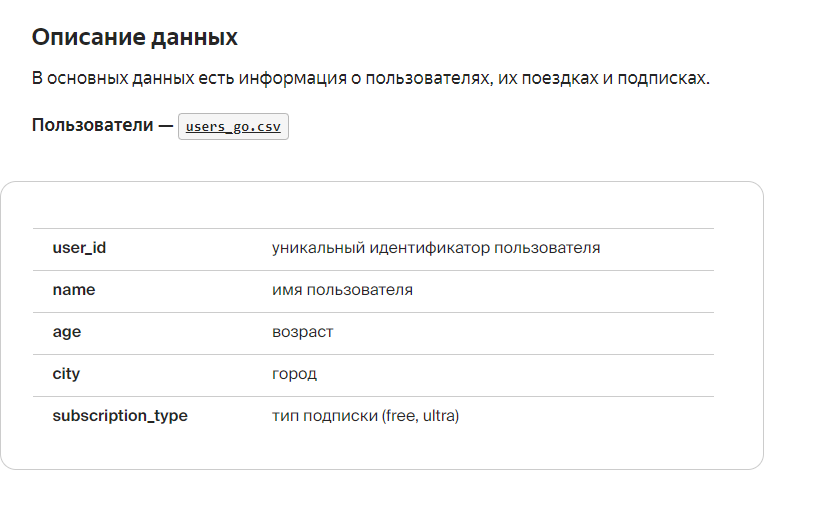

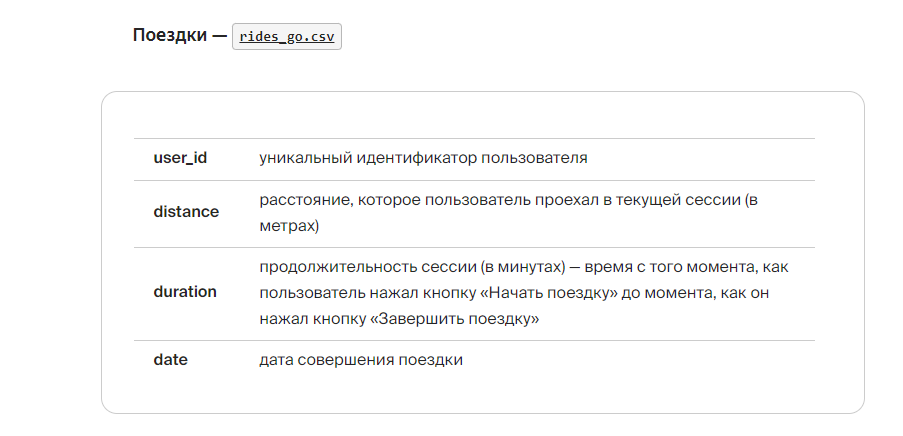

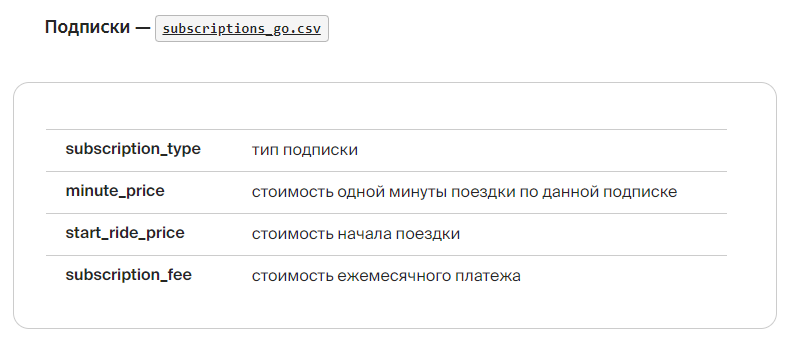

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from math import sqrt

In [4]:
from scipy import stats as st
from scipy.stats import binom, norm

In [5]:
users_dataFrame = '/datasets/users_go.csv'

In [6]:
rides_dataFrame = '/datasets/rides_go.csv'

In [7]:
subscription_dataFrame = '/datasets/subscriptions_go.csv'

#### Шаг 1. Загрузка данных

In [8]:
users_df = pd.read_csv('/datasets/users_go.csv')

In [9]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [10]:
users_df.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [11]:
users_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Как и всегда считываю данные методом read_csv, методом info смотрю на колонки в таблице, проверяя типы данных каждого столбца и затем считаю пропуски методом isna().sum() так буду делать и с последующими датафреймами.

В первом датафрейме пропусков нет, я думаю это связано с тем, что данные параметры при регистрации аккаунта являются обязательными соответсвенно пропусков быть не моежт, это касается информации о возрасте, имени и городе.

In [12]:
rides_df = pd.read_csv(rides_dataFrame)

In [13]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [14]:
rides_df.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [15]:
rides_df.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

При первом просмотре видно, что пропусков также нет, однако тип данных в столбце с датой не соответсвует datetime. Дальше это нужно будет исправить.

In [16]:
subs_df = pd.read_csv(subscription_dataFrame)

In [17]:
subs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [18]:
subs_df.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


При первом просмотре видно, что явных пропусков данных нет, далее будем проверять неявные дубликаты, менять тип данных и добавлять новый столбец.

На этом шаге мы с высоты посмотрели на общую картину по датафреймам и увидели места, с которыми нужно поработать.

#### Шаг 2. Предобработка данных

* 2.1 Приведите столбец date к типу даты pandas.
* 2.2 Создайте новый столбец с номером месяца на основе столбца date.
* 2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [19]:
# Код ревьюера
rides_df.query('user_id == 1')

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [20]:
rides_df['duration'] = rides_df['duration'].astype('int')
rides_df['distance'] = rides_df['distance'].astype('int')

In [21]:
# Код ревьюера
rides_df.query('user_id == 1')

,user_id,distance,duration,date
0,1,4409,25,2021-01-01
1,1,2617,15,2021-01-18
2,1,754,6,2021-04-20
3,1,2694,18,2021-08-11
4,1,4028,26,2021-08-28
5,1,2770,16,2021-10-09
6,1,3039,14,2021-10-19
7,1,2842,23,2021-11-06
8,1,3412,15,2021-11-14
9,1,748,15,2021-11-22


In [22]:
rides_df['date'] = pd.to_datetime(rides_df['date'], format='%Y-%m-%d')

In [23]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  int64         
 2   duration  18068 non-null  int64         
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 564.8 KB


In [24]:
rides_df['month'] = pd.DatetimeIndex(rides_df['date']).month
rides_df['month_first_day'] = rides_df['date'].values.astype('datetime64[M]')

In [25]:
rides_df.head()

,user_id,distance,duration,date,month,month_first_day
0,1,4409,25,2021-01-01,1,2021-01-01
1,1,2617,15,2021-01-18,1,2021-01-01
2,1,754,6,2021-04-20,4,2021-04-01
3,1,2694,18,2021-08-11,8,2021-08-01
4,1,4028,26,2021-08-28,8,2021-08-01


In [26]:
rides_df.duplicated().sum()

0

In [27]:
users_df.duplicated().sum()

31

In [28]:
users_df = users_df.drop_duplicates().reset_index(drop=True)
users_df.duplicated().sum()

0

Возможно я буду не прав, сказав, что неявных дубликатов нет, однако проанализировав все возможные колонки, можно предположить, что может быть есть одинаковые строки с разными id, однако нельзя отрицать, что например в больших городах по типу москвы не найдется два человека с одним и тем же именем и возрастом, имеющих одну и ту же подписку. На данном этапе, я лишь добавил новые столбцы и привел столбец  с датой к нужному типу.
Если мои догадки не верны, то исправлюсь при следующем этапе проверки.

Дубликаты найдены и удалены

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
* 3.1 частота встречаемости городов; +
* 3.2 соотношение пользователей с подпиской и без подписки; +
* 3.3 возраст пользователей; +
* 3.4 расстояние, которое пользователь преодолел за одну поездку; +
* 3.5 продолжительность поездок. +

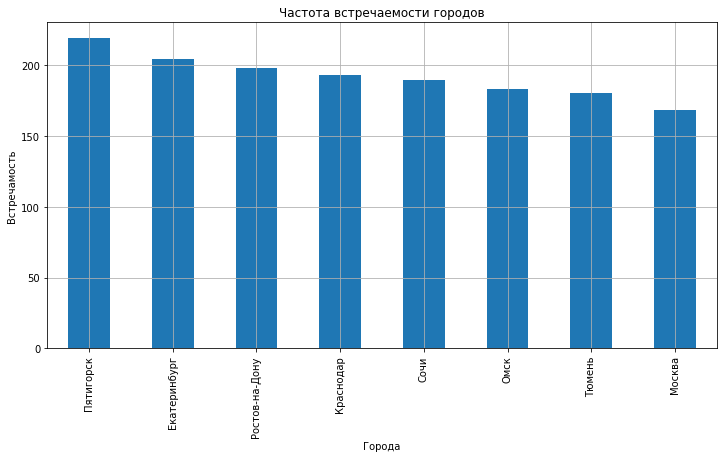

In [29]:
users_df['city'].value_counts().plot.bar(grid=True, figsize=(12, 6));
plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Встречамость')
plt.show();

In [30]:
users_df['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [31]:
users_df['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

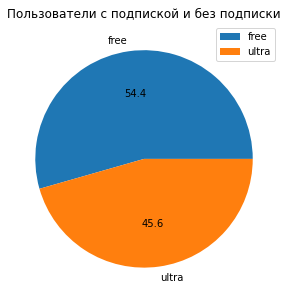

In [32]:
(users_df.pivot_table(index='subscription_type', values='user_id', aggfunc='count')).plot(y='user_id', kind='pie', figsize=(10,5), autopct='%.1f');
plt.ylabel('');
plt.title('Пользователи с подпиской и без подписки');

По диаграмме видно, что кол-во людей с подпиской и без различается буквально в 8.2%

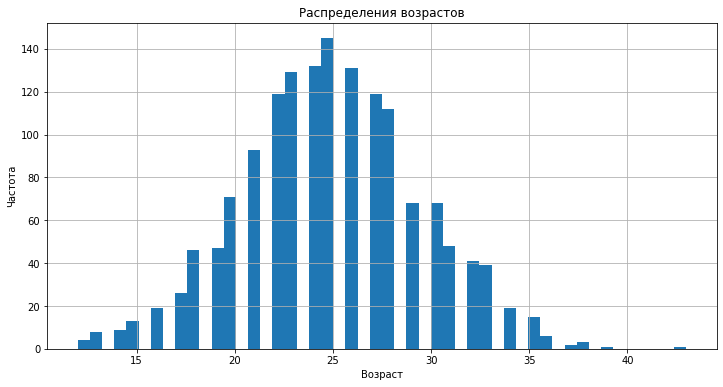

In [33]:
users_df['age'].plot(kind='hist', grid=True, bins=50, figsize=(12, 6));
plt.title('Распределения возрастов');
plt.xlabel('Возраст');
plt.ylabel('Частота');

In [34]:
users_df['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

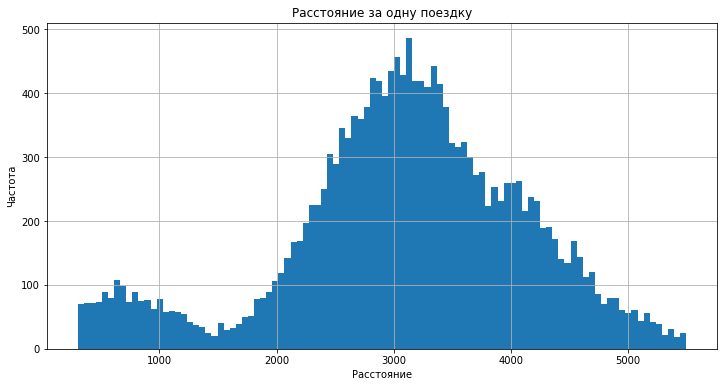

In [35]:
rides_df['distance'].plot(kind='hist', grid=True, figsize=(12, 6), bins=100, range=(300, 5500))
plt.ylabel('Частота')
plt.xlabel('Расстояние')
plt.title('Расстояние за одну поездку');

In [36]:
rides_df['distance'].describe()

count    18068.000000
mean      3070.159841
std       1116.831548
min          0.000000
25%       2542.750000
50%       3133.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

Среди значений поездки, явно были видны аномальные значения, я решил оставить 1 квантиль и q1 - 2*std, 3 квантиль и q3 + 2*std
Таким образом на графике нет аномаьных значений и если оставить значения от 1 до 3 квантилей, то распределение будет похоже на нормальное.

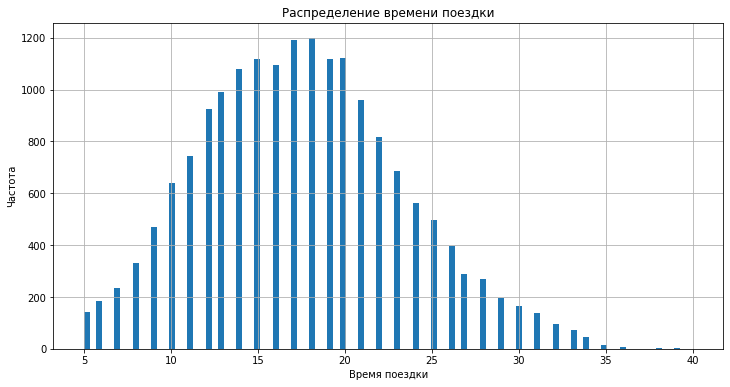

In [37]:
rides_df['duration'].plot(kind='hist', grid=True, figsize=(12, 6), bins=100, range=(5, 40))
plt.ylabel('Частота')
plt.xlabel('Время поездки')
plt.title('Распределение времени поездки');

In [38]:
rides_df['duration'].describe()

count    18068.000000
mean        17.303520
std          6.094928
min          0.000000
25%         13.000000
50%         17.000000
75%         21.000000
max         40.000000
Name: duration, dtype: float64

Распределение значений здесь тоже похоже на нормальное, однако есть неожиданный подъем в самом начале графика, где продолжительность поездки меньше 5 минут.

В данном блоке, я рассмотрел общую информацию о пользователях и поездках. Вся информация представлена на графиках выше.

#### Шаг 4. Объединение данных

* 4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
* 4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
* 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [39]:
len(rides_df)

18068

In [40]:
df = (users_df.merge(rides_df, on='user_id')).merge(subs_df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  int64         
 6   duration           18068 non-null  int64         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   month_first_day    18068 non-null  datetime64[ns]
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 1.9+ 

In [42]:
df.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,month_first_day,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409,25,2021-01-01,1,2021-01-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617,15,2021-01-18,1,2021-01-01,6,0,199
2,1,Кира,22,Тюмень,ultra,754,6,2021-04-20,4,2021-04-01,6,0,199
3,1,Кира,22,Тюмень,ultra,2694,18,2021-08-11,8,2021-08-01,6,0,199
4,1,Кира,22,Тюмень,ultra,4028,26,2021-08-28,8,2021-08-01,6,0,199
5,1,Кира,22,Тюмень,ultra,2770,16,2021-10-09,10,2021-10-01,6,0,199
6,1,Кира,22,Тюмень,ultra,3039,14,2021-10-19,10,2021-10-01,6,0,199
7,1,Кира,22,Тюмень,ultra,2842,23,2021-11-06,11,2021-11-01,6,0,199
8,1,Кира,22,Тюмень,ultra,3412,15,2021-11-14,11,2021-11-01,6,0,199
9,1,Кира,22,Тюмень,ultra,748,15,2021-11-22,11,2021-11-01,6,0,199


In [43]:
sub_on_df = df[df['subscription_type'] == 'ultra']
sub_on_df

,user_id,name,age,city,subscription_type,distance,duration,date,month,month_first_day,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409,25,2021-01-01,1,2021-01-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617,15,2021-01-18,1,2021-01-01,6,0,199
2,1,Кира,22,Тюмень,ultra,754,6,2021-04-20,4,2021-04-01,6,0,199
3,1,Кира,22,Тюмень,ultra,2694,18,2021-08-11,8,2021-08-01,6,0,199
4,1,Кира,22,Тюмень,ultra,4028,26,2021-08-28,8,2021-08-01,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973,24,2021-08-29,8,2021-08-01,6,0,199
6496,699,Оксана,22,Москва,ultra,3288,15,2021-09-12,9,2021-09-01,6,0,199
6497,699,Оксана,22,Москва,ultra,3076,14,2021-09-26,9,2021-09-01,6,0,199
6498,699,Оксана,22,Москва,ultra,4707,15,2021-10-17,10,2021-10-01,6,0,199


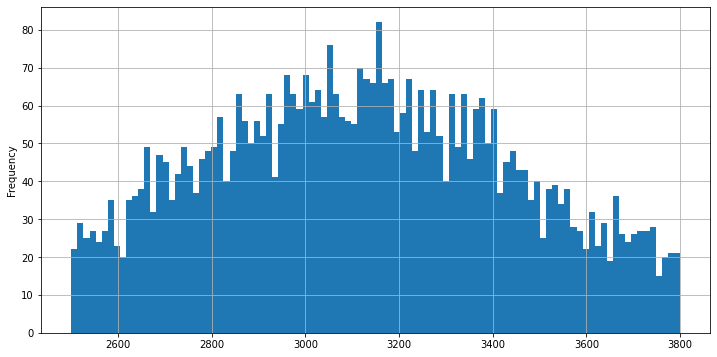

In [44]:
sub_on_df['distance'].plot(kind='hist', bins=100, figsize=(12, 6), grid=True ,range=(2500, 3800));

In [45]:
sub_on_df['distance'].describe()

count    6500.000000
mean     3114.949231
std       836.894838
min       244.000000
25%      2785.000000
50%      3148.000000
75%      3560.000000
max      5699.000000
Name: distance, dtype: float64

<AxesSubplot:ylabel='Frequency'>

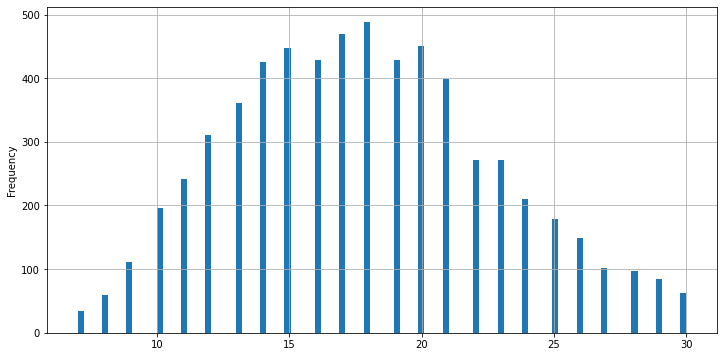

In [46]:
sub_on_df['duration'].plot(kind='hist', bins=100, figsize=(12, 6), grid=True, range=(7, 30))
# sub_off_df['duration'].plot(kind='hist', bins=100, figsize=(12, 6), grid=True, range=(7, 30));

In [47]:
sub_on_df['duration'].describe()

count    6500.000000
mean       18.037692
std         5.577439
min         3.000000
25%        14.000000
50%        18.000000
75%        21.000000
max        40.000000
Name: duration, dtype: float64

In [48]:
# sub_off_df = df[df['subscription_type'] != 'ultra']
sub_off_df = df.query('subscription_type != "ultra"')
sub_off_df

,user_id,name,age,city,subscription_type,distance,duration,date,month,month_first_day,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515,14,2021-01-02,1,2021-01-01,8,50,0
6501,700,Айдар,22,Омск,free,846,16,2021-02-01,2,2021-02-01,8,50,0
6502,700,Айдар,22,Омск,free,4004,20,2021-02-04,2,2021-02-01,8,50,0
6503,700,Айдар,22,Омск,free,1205,9,2021-02-10,2,2021-02-01,8,50,0
6504,700,Айдар,22,Омск,free,3047,17,2021-02-14,2,2021-02-01,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781,19,2021-11-04,11,2021-11-01,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840,21,2021-11-16,11,2021-11-01,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826,18,2021-11-18,11,2021-11-01,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902,16,2021-11-27,11,2021-11-01,8,50,0


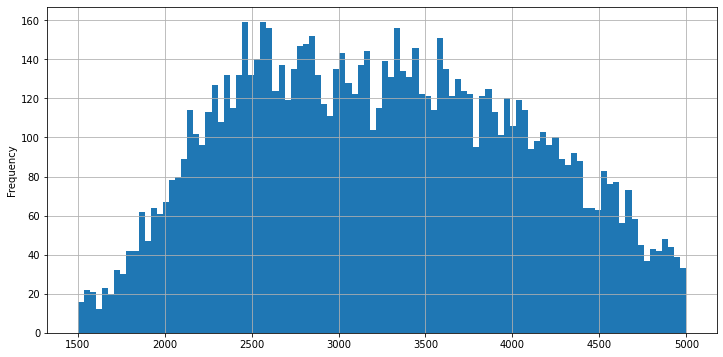

In [49]:
sub_off_df['distance'].plot(kind='hist', bins=100, figsize=(12, 6), grid=True ,range=(1500, 5000));

In [50]:
sub_off_df['distance'].describe()

count    11568.000000
mean      3044.992911
std       1246.174341
min          0.000000
25%       2366.000000
50%       3114.000000
75%       3905.000000
max       7211.000000
Name: distance, dtype: float64

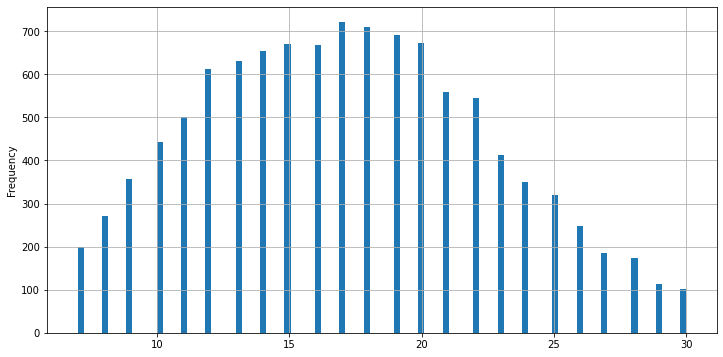

In [51]:
sub_off_df['duration'].plot(kind='hist', bins=100, figsize=(12, 6), grid=True, range=(7, 30));

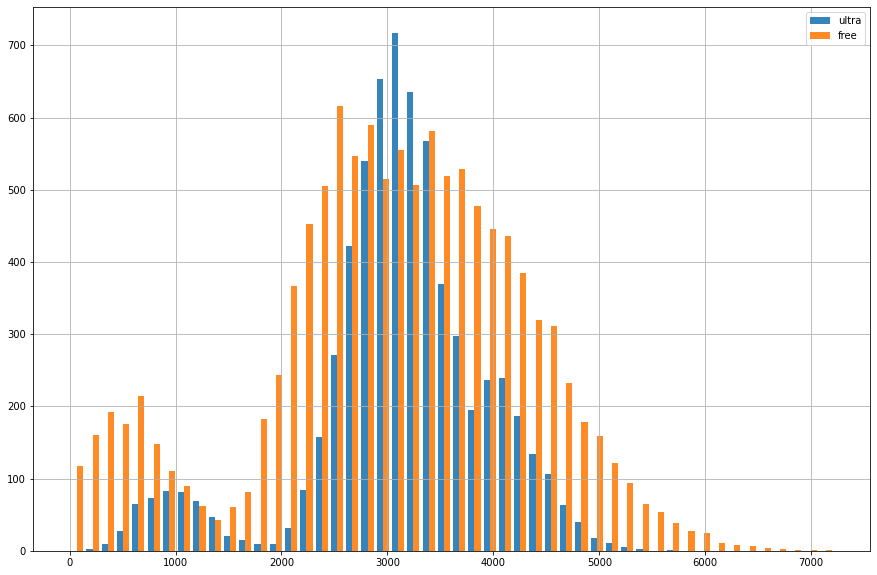

In [52]:
plt.figure(figsize=(15,10))
plt.hist([sub_on_df['distance'], sub_off_df['distance']], alpha=0.9, bins=50, label=['ultra', 'free'])
plt.grid()
plt.legend()
plt.show();

In [53]:
sub_off_df['duration'].describe()

count    11568.000000
mean        16.890992
std          6.330250
min          0.000000
25%         12.000000
50%         17.000000
75%         21.000000
max         34.000000
Name: duration, dtype: float64

#### Шаг 5. Подсчёт выручки

* 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
* 5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3 25.3, 25.5 25.5 и 26.0 26.0 должны быть преобразованы к 26 26.

5.1

In [54]:
users = df.pivot_table(index=['user_id', 'month', 'subscription_type'],  values=['distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'], aggfunc={'distance':['sum', 'count'], 'duration':'sum', 'start_ride_price':'mean', 'minute_price':'mean', 'subscription_fee':'mean'})
users.columns = [ 'count', 'total_distance', 'total_duration', 'minute_price', 'start_ride_price', 'subscription_fee']
users['total_duration'] = np.ceil(users['total_duration'])
users

count  total_distance  total_duration  \
user_id month subscription_type                                          
1       1     ultra                  2            7026            40.0   
        4     ultra                  1             754             6.0   
        8     ultra                  2            6722            44.0   
        10    ultra                  2            5809            30.0   
        11    ultra                  3            7002            53.0   
...                                ...             ...             ...   
1534    6     free                   2            3409            24.0   
        8     free                   2            7621            46.0   
        9     free                   1            4928            22.0   
        11    free                   4           13349            74.0   
        12    free                   1            2371            15.0   

                                 minute_price  start_ride_price  \
user_id month subscription_type                                   
1       1     ultra                         6                 0   
        4     ultra                         6                 0   
        8     ultra                         6                 0   
        10    ultra                         6                 0   
        11    ultra                         6                 0   
...                                       ...               ...   
1534    6     free                          8                50   
        8     free                          8                50   
        9     free                          8                50   
        11    free                          8                50   
        12    free                          8                50   

                                 subscription_fee  
user_id month subscription_type                    
1       1     ultra                           199  
        4     ultra                           199  
        8     ultra                           199  
        10    ultra                           199  
        11    ultra                           199  
...                                           ...  
1534    6     free                              0  
        8     free                              0  
        9     free                              0  
        11    free                              0  
        12    free                              0  

[11331 rows x 6 columns]

5.2

In [55]:
users['revenue'] = users['subscription_fee'] + users['start_ride_price'] * users['count'] + users['minute_price'] * users['total_duration']
users.reset_index(drop=True)
users

count  total_distance  total_duration  \
user_id month subscription_type                                          
1       1     ultra                  2            7026            40.0   
        4     ultra                  1             754             6.0   
        8     ultra                  2            6722            44.0   
        10    ultra                  2            5809            30.0   
        11    ultra                  3            7002            53.0   
...                                ...             ...             ...   
1534    6     free                   2            3409            24.0   
        8     free                   2            7621            46.0   
        9     free                   1            4928            22.0   
        11    free                   4           13349            74.0   
        12    free                   1            2371            15.0   

                                 minute_price  start_ride_price  \
user_id month subscription_type                                   
1       1     ultra                         6                 0   
        4     ultra                         6                 0   
        8     ultra                         6                 0   
        10    ultra                         6                 0   
        11    ultra                         6                 0   
...                                       ...               ...   
1534    6     free                          8                50   
        8     free                          8                50   
        9     free                          8                50   
        11    free                          8                50   
        12    free                          8                50   

                                 subscription_fee  revenue  
user_id month subscription_type                             
1       1     ultra                           199    439.0  
        4     ultra                           199    235.0  
        8     ultra                           199    463.0  
        10    ultra                           199    379.0  
        11    ultra                           199    517.0  
...                                           ...      ...  
1534    6     free                              0    292.0  
        8     free                              0    468.0  
        9     free                              0    226.0  
        11    free                              0    792.0  
        12    free                              0    170.0  

[11331 rows x 7 columns]

In [56]:
rev_ultra = users.loc[users['subscription_fee'] > 0].pivot_table(index=['month'], values='revenue', aggfunc='sum');
rev_free = users.loc[users['subscription_fee'] == 0].pivot_table(index=['month'], values='revenue', aggfunc='sum');

In [57]:
rev_ultral = rev_ultra['revenue'].tolist()

In [58]:
rev_freel = rev_free['revenue'].tolist()

In [59]:
rev_ultra

,revenue
month,
1,140604.0
2,121764.0
3,139242.0
4,134012.0
5,145653.0
6,140444.0
7,140022.0
8,135294.0
9,126247.0


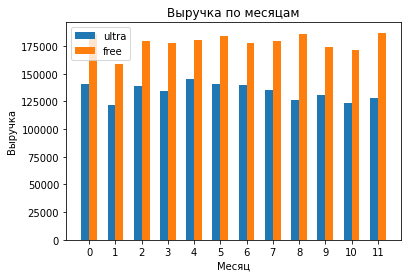

In [60]:
month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
width = 0.3
x = np.arange(12)
fig, ax = plt.subplots()
ax.bar(x - width/2, rev_ultral, width, label='ultra')
ax.bar(x + width/2, rev_freel, width, label='free')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка')
ax.set_title('Выручка по месяцам')
ax.set_xticks(x)
#ax.set_xticklabels(12)
ax.legend();
# m = {'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}
# month = pd.DataFrame(data=m)
# width = 0.3
# x = np.arange(12)
# fig, ax = plt.subplots()
# ax.bar(x - width/2, rev_ultral, width, label='ultra')
# ax.bar(x + width/2, rev_freel, width, label='free')
# ax.set_xlabel('Месяц')
# ax.set_ylabel('Выручка')
# ax.set_title('Выручка по месяцам')
# ax.set_xticks(month['month'])
# ax.legend();

#### Шаг 6. Проверка гипотез

* Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
* 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
* 6.2 Расстояние одной поездки в 
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130
3130 метров? Проверьте гипотезу и сделайте выводы.
* 6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
* 6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

6.1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Нулевая гипотеза пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
Альтернативная гипотеза: Пользователи с подпиской тратят меньше времени, чем пользователи без подписки.

In [61]:
results = st.ttest_ind(
    sub_on_df['duration'], 
    sub_off_df['duration'], 
    alternative='greater')
print(results.pvalue)

p = 0.05
if results.pvalue < p:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


Здесь сравниваюьтся две независимые друг от друга выборки, пользователи с подпиской и пользователи без подписки. Так как мы ставим утверждение, что пользователи  с подпиской тратят БОЛЬШЕ времени на поездки то в параметр alternative мы ставим 'greater'. 

6.2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая гипотеза: Среднее расстояние меньше 3130.
Альтернативная гипотеза: Среднее расстояние больше 3130  метров.

In [62]:
p = 0.05
data = sub_on_df['distance']
value = 3130
results = st.ttest_1samp(data, value, alternative='greater')
print('p-value', results.pvalue)
if results.pvalue < p:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value 0.9264356652998772
Не отвергаем нулевую гипотезу


Исходя из кода выше, можно сделать вывод, что отрицать нулевую гипотезу нельзя. 

6.3

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Нулевая гипотеза: Помесячная выручка пользователей с подпиской равна выручке пользователей без подписки.
Альтернативная гипотеза: Помесячная выручка пользователей с подпискиой меньше, чем у пользователей без подписки.

In [63]:
data1 = users.loc[users['subscription_fee'] >  0, 'revenue']
data1

user_id  month  subscription_type
1        1      ultra                439.0
         4      ultra                235.0
         8      ultra                463.0
         10     ultra                379.0
         11     ultra                517.0
                                     ...  
699      6      ultra                295.0
         8      ultra                457.0
         9      ultra                373.0
         10     ultra                289.0
         12     ultra                349.0
Name: revenue, Length: 4533, dtype: float64

In [64]:
data2 = users.loc[users['subscription_fee'] ==  0, 'revenue']
data2

user_id  month  subscription_type
700      1      free                 162.0
         2      free                 922.0
         3      free                 194.0
         4      free                 170.0
         6      free                 316.0
                                     ...  
1534     6      free                 292.0
         8      free                 468.0
         9      free                 226.0
         11     free                 792.0
         12     free                 170.0
Name: revenue, Length: 6798, dtype: float64

In [65]:
p = 0.05
result = st.ttest_ind(data1, data2, alternative='greater')
print(result.pvalue)

if result.pvalue < p:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

1.1914705742669238e-43
Отвергаем нулевую гипотезу


6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Нулевая гипотеза: Кол-во обращений в техподдержку после работы на сервере станет меньше, чем кол-во обращений до работы на сервере.
Алтернативная гипотеза: Кол-во обращений в техподдержку после работы на сервере не изменилась или стала больше.
Здесь больше всего подходит двухвыборочный t-тест для зависимых выборок. По сути своей у нас есть совокупность до изменений сервера и есть совокупность после, но на самом деле это совокупность после изменений сервера это выборка из генеральной совокупности до работ на сервере. Поэтому здесь лучше всего подойдет именно этот t-test  

#### Шаг 7 (необязательное задание). Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

В данном случае есть параметр успеха р = 10% нужно найти второй параметр n кол-во промокодов, такие параметры встречаются в биномиальном распределении.
n = ?
Предположим, что 100 существующих пользователей продлили подписку они являются 10% следовательно 100% = 1000 человек

In [66]:
p = 0.1
target = 1000
k = 100 - 1
n = 0

while st.binom(n, p).cdf(99) > 0.05:
    n+=1
n

mu = n*p
sigma = sqrt(n*p * (1 - p))

In [67]:
#Код ревьюера 
st.binom(100, p).cdf(99)

1.0

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [68]:
# Заведем параметры биномиального распределения
p = 0.4 #Вероятность успеха
n = 1000000 # Кол-во уведомлений 
target = 399500 # целевая переменная 

mu = n * p # Мат ожидание в биномиальном распределении
sigma = sqrt(n * p * (1 - p)) # Стандартное отклонение

# Строим нормальное распределение по мат ожиданию и стандартному отклонению
distr = st.norm(mu, sigma)
# Считаем вероятность попасть в диапозон меньше или равно (не более), чем целевая переменная
result = distr.cdf(target)

result
#Как график строить я тоже не понимаю честно говоря...

0.15371708296369768

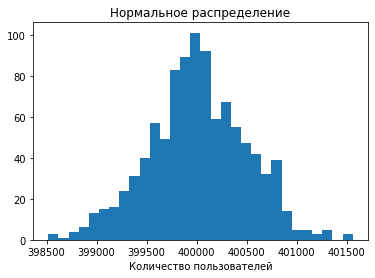

In [69]:
# Код ревьюера
n = 1000000
p = 0.4

mu = n * p
sigma = np.sqrt(n * p * (1 - p))
s = np.random.normal(mu, sigma, 1000)

distr = st.norm(mu, sigma)

plt.hist(s, 30)
plt.title('Нормальное распределение')
plt.xlabel('Количество пользователей');


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Это задание выполнено верно. Пример построения графика выше

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Итогового вывода не хватило
</div>

# Общий Вывод

Последовательно разберу каждый шаг в проекте.

1 Этап 

Общий анализ данных

На этом этапе я прочитал таблицы, проанализировал столбцы и строки внутри, оценил типы данных в столбцах.

2 Этап

Предобработка данных

На этом этапе, были исправлены типы данных в различных столбцах. Столбец с датой был приведен к соответсвующему типу, столбец с информацией о расстоянии в поездке был приведен к целочисленному типу данных, дял удобства работы.

Также была проведена с пропусками. Через нужные методы было обнаружено, что пропущенных значений в таблице нет.


3 Этап

Исследовательский анализ

На этапе исследовательского анализа мне нужно было:

Описать и визуализировать общую информацию об
* частоте встречаемости городов;
* соотношении пользователей с подпиской и без подписки; 
* возрасте пользователей; 
* расстоянии, которое пользователь преодолел за одну поездку; 
* продолжительности поездок.

Пойдем по порядку.

Полученные данные
- Пятигорск         219
- Екатеринбург      204
- Ростов-на-Дону    198
- Краснодар         193
- Сочи              189
- Омск              183
- Тюмень            180
- Москва            168

Больше всех с небольшим отрывом от Екатеринбурга встречается город Пятигорск

Частота встречаемости на графике

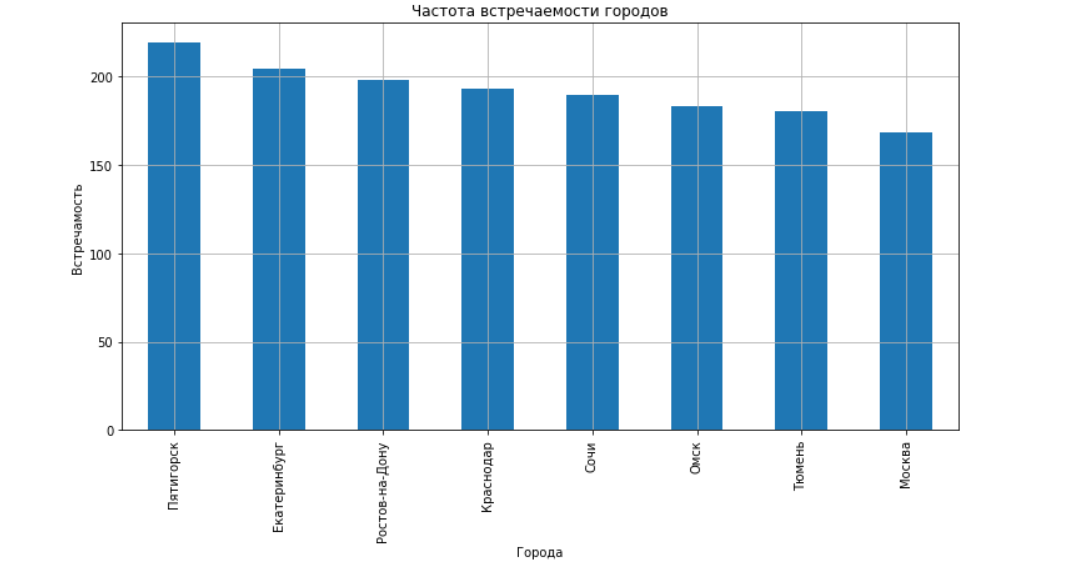

Далее на круговой диаграмме представлено соотношение пользователй с подпиской и без подписки. Число пользователей без подписки больше чем с ней.

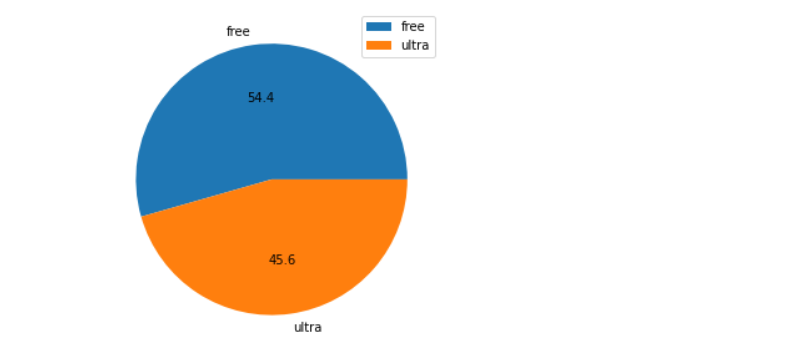

На гистограмме ниже представлено распределение возрастов, присутствуют пользователи младше 18 лет, на сколько мне известно, такого быть не должно и стоит лучше проверять поле возраст при регистрации аккаунта.

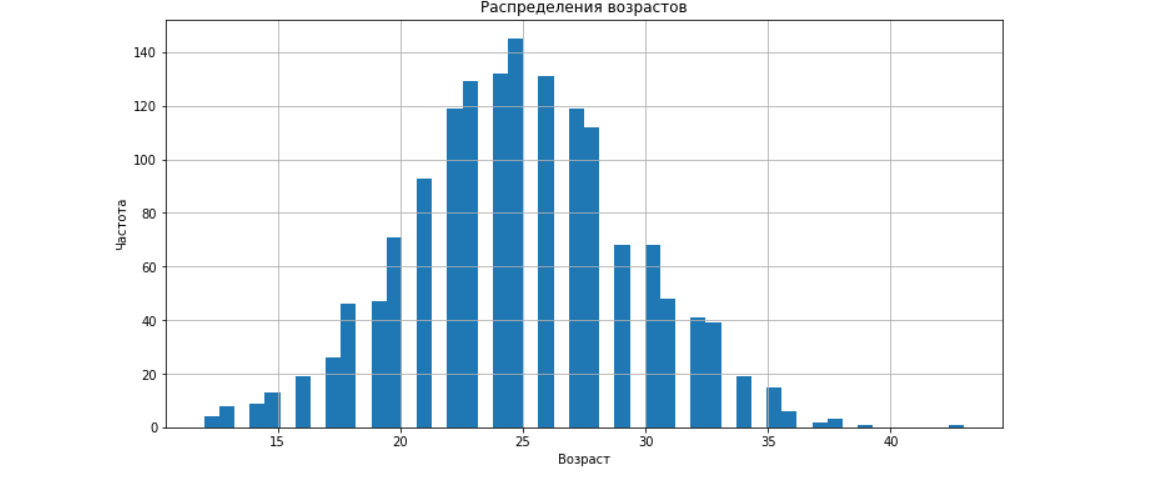

Ниже также на гистограмме представлено распределение расстояний за одну поездку.

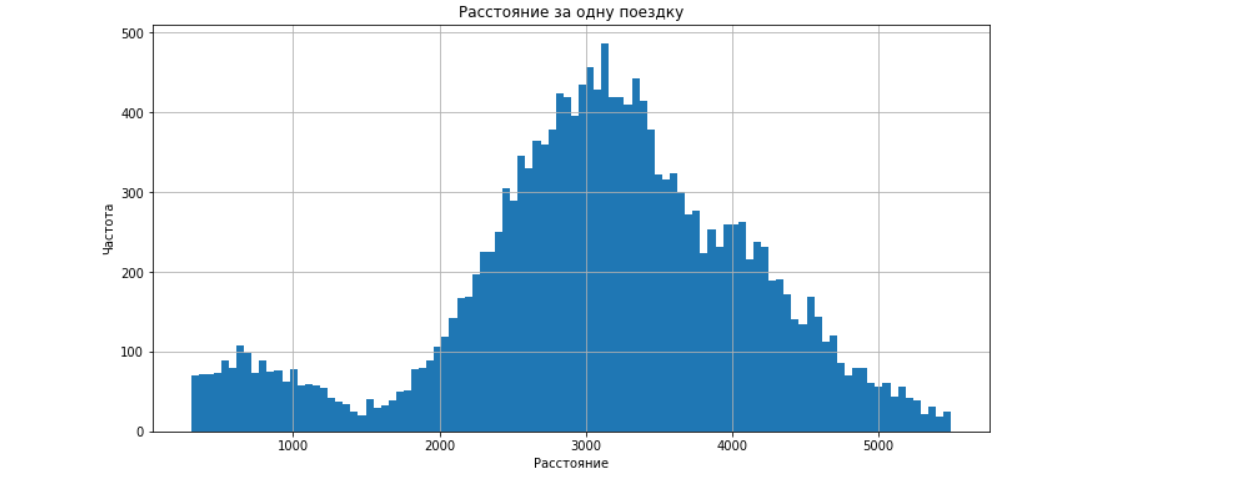

И в завершение, распредление времени поездки

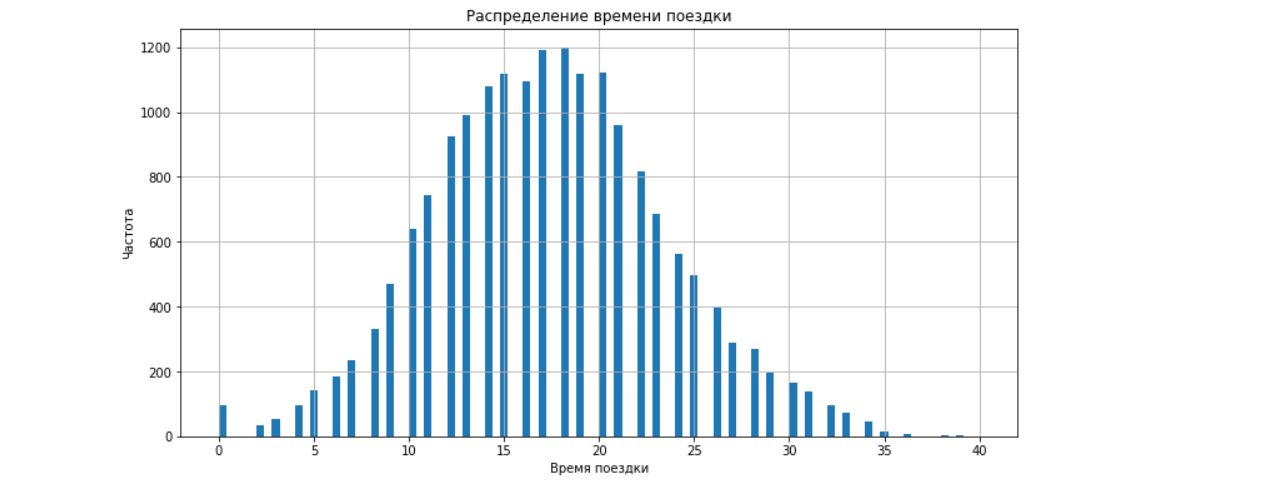


Этап 4

Объединение данных

На 4 этапе я соединил  все исходные таблцицы в одну для простоты работы со всеми данными.

Затем разделил общую таблицу на две таблицы с информацией о пользователях с подпиской и без подписки

Этап 5

Расчет выручки

На 5 этапе была создана сводная таблица со всеми нужными для подсчета выручки значениями.
И затем был добавлен столбец с итоговой выручкой по каждому месяцу.

Ниже прикладываю столбчатую диаграмму с выручкой по каждому месяцу.

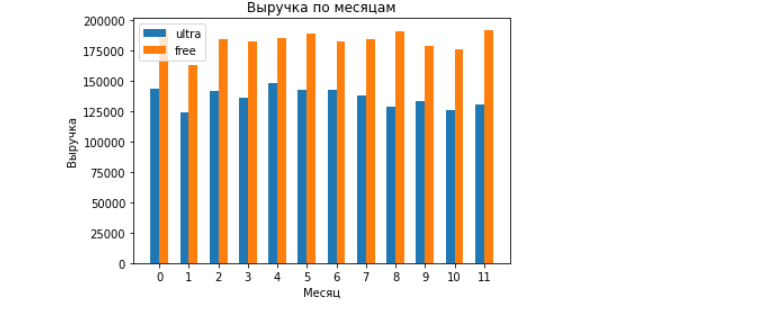

Этап 6

Проверка гипотез

Данный гипотезы мне необходимо было проверить

1) Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

2) Расстояние одной поездки в 
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130
3130 метров? Проверьте гипотезу и сделайте выводы.

3) Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

4) Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

#### 1 гипотеза.

Нулевая гипотеза пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
Альтернативная гипотеза: Пользователи с подпиской тратят меньше времени, чем пользователи без подписки.

Выяснилось, что нулевую гипотезу можно отвергнуть, я считаю, что это связано с тем, что люди с подпиской берут самокаты чаще и ездят на меньшие расстояния, чем люди с подпиской, так как не выгодно ездить на небольшие расстояния без подписки. Соответственно люди без подписки проводят в пути больше времени.

#### 2 гипотеза.

Нулевая гипотеза: Среднее расстояние меньше 3130.
Альтернативная гипотеза: Среднее расстояние больше 3130  метров.

Из полученного значения, не отвергаем нулевую гипотезу и в среднем расстояние поездки не превышает 3130 метров

#### 3 гипотеза.

Нулевая гипотеза: Помесячная выручка пользователей с подпиской равна выручке пользователей без подписки.
Альтернативная гипотеза: Помесячная выручка пользователей с подпискиой меньше, чем у пользователей без подписки.

Нулевая гипотеза отвергается. Я считаю, что это связано с несколькими факторами.
- Людей без подписки больше, следовательно больше людей платят за старт, а это по 50 рублей к каждой поездке
- Люди без подписки ездят дольше по времени, так как хотят "отбить" эти 50 рублей за старт

#### 4 гипотеза.

Нулевая гипотеза: Кол-во обращений в техподдержку после работы на сервере снизится.
Алтернативная гипотеза: Кол-во обращений в техподдержку после работы на сервере не изменилась или стала больше.

Здесь больше всего подходит двухвыборочный t-тест для зависимых выборок. По сути своей у нас есть совокупность до изменений сервера и есть совокупность после, но на самом деле это совокупность после изменений сервера это выборка из генеральной совокупности до работ на сервере. Поэтому здесь лучше всего подойдет именно этот t-test 


7 Этап

Распределения

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Я получил значение 1161, именно это кол-во промокодов, которое нкжно разослать, чтобы 10% людей продлили прописку, с 5% процентом не выполнить план, при условии, что 


Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Выяснил что вероятность успеха 15%

<div class="alert alert-info"> <b>Комментарий студента:</b> Поделись пожалуйста ссылками для лучшего изучения распределений, аппроксимаций и так далее, желательно простым языком,  потому что порой в инете ничего поонятного найти невозможно, заранее спасибо).</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Анатолий Карпов замечательный - https://stepik.org/course/76/promo

</div>